# Analiza danych wielowymiarowych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from scipy.stats import multivariate_normal

##Rozkład wielomianowy
Zmienna losowa $(X_1, X_2, \ldots, X_k)$ ma rozkład wielomianowy, jeżeli
\begin{equation*}
    P(X_1=n_1, \ldots, X_k=n_k)=\frac{n!}{n_1!\cdot\ldots\cdot n_k!}p_1^{n_1}\cdot\ldots\cdot p_k^{n_k},
\end{equation*}
gdzie $p_i\in(0,1)$, $i=1,2,\ldots, k$, $p_1+p_2+\ldots+p_k=1$, $n_1+n_2+\ldots+n_k=n$.

Rozkład wielomianowy jest uogólnieniem rozkładu dwumianowego i opisuje rozkład wyników przy $n$-krotnym powtórzeniu doświadczenia o $k$ możliwych rezultatach.

$X_i$ oznacza liczbę wyników $i$-tego typu w serii.

Rozkład wielomianowy można wykorzystać do obliczenia prawdopodobieństwa w sytuacjach, w których istnieją więcej niż dwa możliwe wyniki.

## Zadanie 1 - Rozkład wielomianowy

1. Zdefiniuj zmienną losową dla rozkładu wielomianowego (`stats.multinomial`).
2. Wygeneruj $n$ punktów z zaproponowanego rozkładu wielomianowego, narysuj histogramy.
2. Oblicz: w pewnym mieście 40% uprawnionych do głosowania popiera kandydata A, 10% popiera kandydata B, a pozostałe 50% nie ma preferencji. Wybieramy losowo 10 uprawnionych do głosowania. Jakie jest prawdopodobieństwo, że 4 z nich popiera kandydata A, 1 popiera kandydata B, a pozostałe 5 nie będzie miało preferencji?

      A  B  C
0     6  0  4
1     3  1  6
2     7  0  3
3     5  1  4
4     6  0  4
...  .. .. ..
9995  3  1  6
9996  5  1  4
9997  6  1  3
9998  5  0  5
9999  6  1  3

[10000 rows x 3 columns]


0.10080000000000021

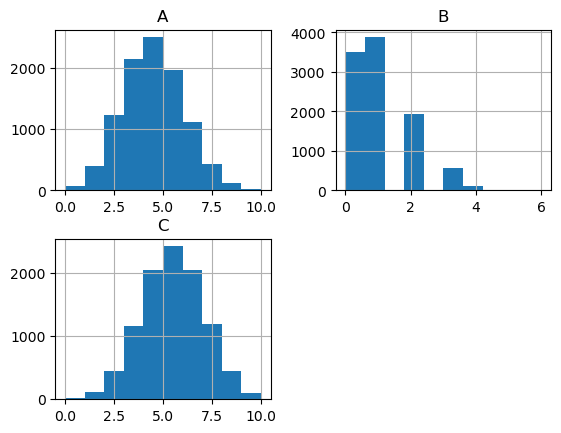

In [10]:
#1 i 2
multi10 = stats.multinomial(10, [0.4, 0.1, 0.5])
x = pd.DataFrame(multi10.rvs(10000),columns=['A','B','C'])
print(x)
x.hist(bins=10)
#3
multi10.pmf([4,1,5]) # pmf - probability mass function
# wychodzi p = 0.1 ze tak bedzie 
# 

#Rozkład dwuwymiarowy normalny
Zmienna losowa $(X, Y)$ ma rozkład dwuwymiarowy normalny z parametrami $\mu_X$, $\mu_Y$, $\sigma_X>0$, $\sigma_Y>0$ oraz $\rho\in(-1,1)$, jeżeli jej gęstość $f$ wyraża się wzorem
\begin{equation*}
    f(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y\sqrt{1-\rho^2}} \exp\Bigg\{-\frac{1}{2(1-\rho^2)}\Bigg[\frac{(x-\mu_X)^2}{\sigma^2_X} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} \Bigg] \Bigg\}.
\end{equation*}

\pause
\textit{Jeżeli dwuwymiarowa zmienna losowa $(X, Y)$ ma rozkład normalny, to zmienne losowe $X$ i $Y$ mają, odpowiednio, jednowymiarowe rozkłady normalne $\mathcal{N}(\mu_X, \sigma_X)$~i~$\mathcal{N}(\mu_Y, \sigma_Y)$.}

## Zadanie 2 - Dwuwymiarowy rozkład normalny
1. Zdefiniuj zmienną losową dla rozkładu normalnego 2-wymiarowego (`multivariate_normal`, `np.meshgrid`).
2. Narysuj gęstość (`multivariate_normal.pdf`) oraz wykres konturowy gęstości (`plot_surface` i `contourf`).
3. Wylosuj $n$ obserwacji ze zdefiniowanego rozkładu i narysuj wykres rozproszenia dla wylosowanej próbki.
4. Porównaj wykresy gęstości dla różnych wartości wektora średniej i macierzy kowariancji.

In [11]:
mu = [0,0] # srednia x, srednia y w liscie
s=[[1,0],[0,1]] # to jest wariancja x i wariancja y (oba 1), to jest ro dla x  i dla y (tutaj 0) 
# musza dla x i y byc rowne zeby zadzialalo

mnormal = multivariate_normal(mean = mu,cov = s)

In [12]:
XY = mnormal.rvs(size=1000)
XY

array([[-0.43533381, -1.49756134],
       [ 1.60154161,  0.69769345],
       [ 2.44129021, -0.37239908],
       ...,
       [-0.5089148 ,  1.22319735],
       [ 0.20237472, -0.84835809],
       [-0.3974247 ,  0.77643696]])

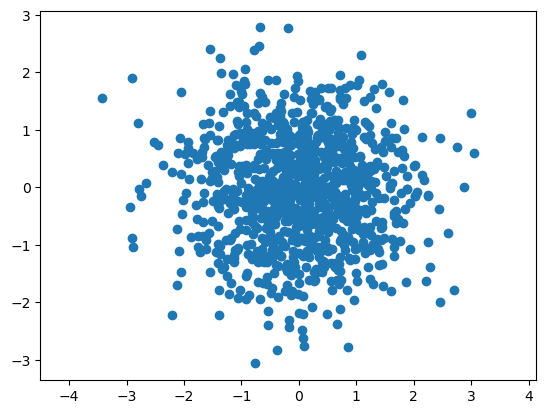

In [13]:
plt.scatter(XY[:,0],XY[:,1])
plt.axis('equal')
plt.show()

In [14]:
#techniczne przeróbki, aby narysować gęstość 3D
N = 100
X = np.linspace(-5,5,N)
Y = np.linspace(-5,5,N)
X,Y = np.meshgrid(X,Y)
print(X)
print(Y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
pos

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
[[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]


array([[[-5.       , -5.       ],
        [-4.8989899, -5.       ],
        [-4.7979798, -5.       ],
        ...,
        [ 4.7979798, -5.       ],
        [ 4.8989899, -5.       ],
        [ 5.       , -5.       ]],

       [[-5.       , -4.8989899],
        [-4.8989899, -4.8989899],
        [-4.7979798, -4.8989899],
        ...,
        [ 4.7979798, -4.8989899],
        [ 4.8989899, -4.8989899],
        [ 5.       , -4.8989899]],

       [[-5.       , -4.7979798],
        [-4.8989899, -4.7979798],
        [-4.7979798, -4.7979798],
        ...,
        [ 4.7979798, -4.7979798],
        [ 4.8989899, -4.7979798],
        [ 5.       , -4.7979798]],

       ...,

       [[-5.       ,  4.7979798],
        [-4.8989899,  4.7979798],
        [-4.7979798,  4.7979798],
        ...,
        [ 4.7979798,  4.7979798],
        [ 4.8989899,  4.7979798],
        [ 5.       ,  4.7979798]],

       [[-5.       ,  4.8989899],
        [-4.8989899,  4.8989899],
        [-4.7979798,  4.8989899],
        .

In [15]:
Z = mnormal.pdf(pos)

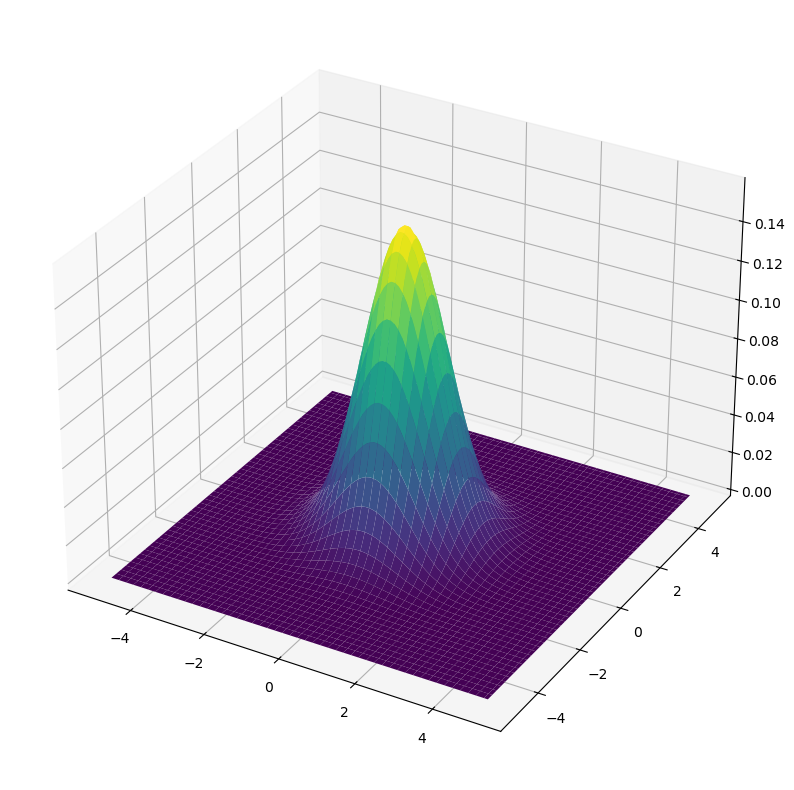

In [16]:
#gęstość
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)

C:\Users\BPE\AppData\Local\Temp\ipykernel_16144\2401250303.py:3: UserWarning: The following kwargs were not used by contour: 'origincmap'
  ax.contourf(X,Y,Z,origincmap = cm.viridis);


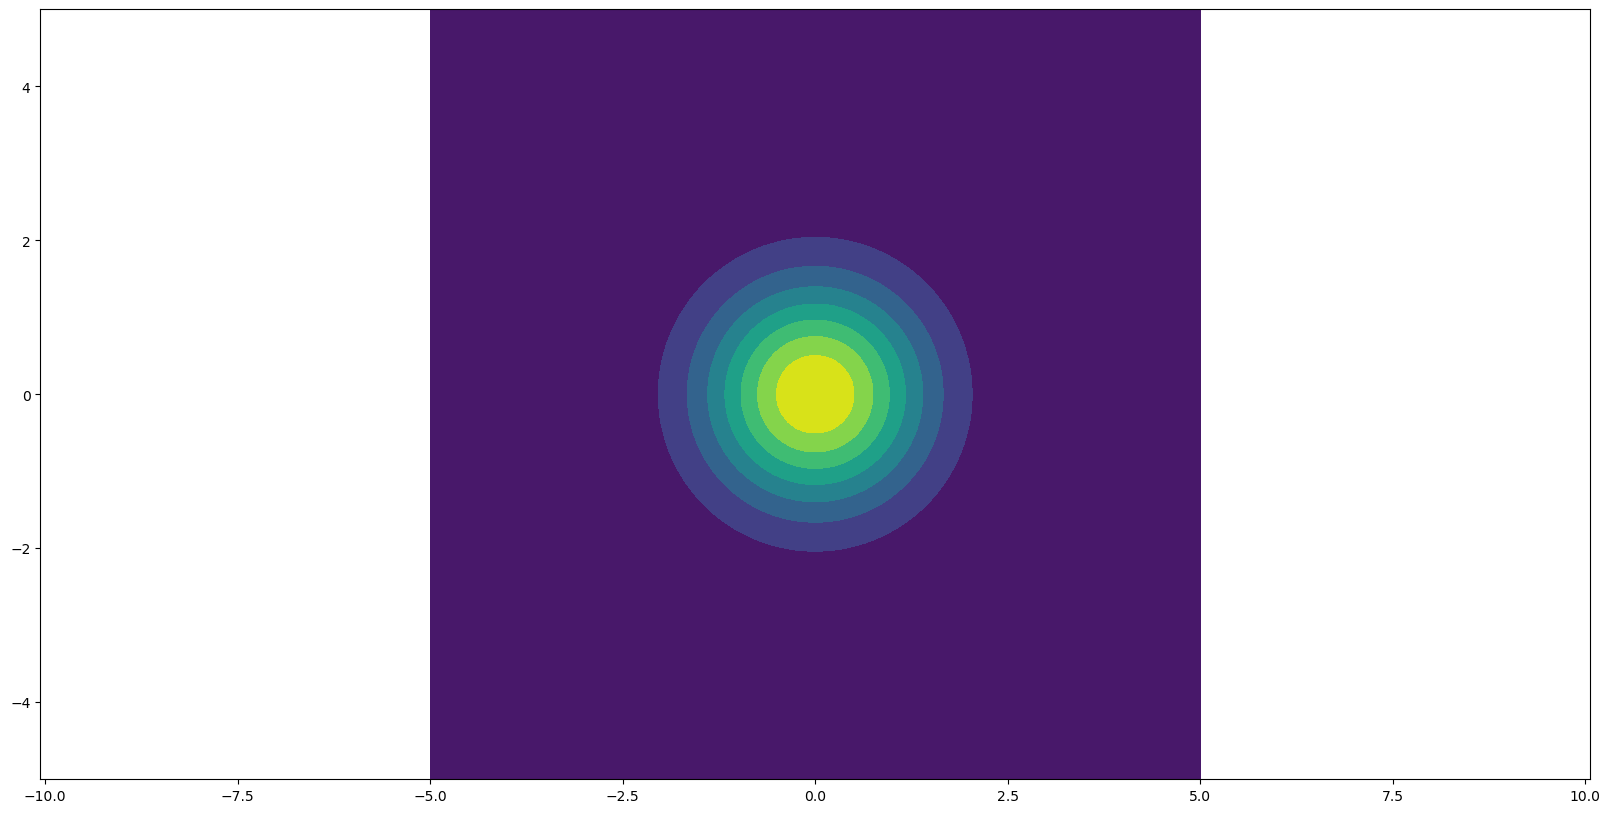

In [20]:
fig,ax = plt.subplots(figsize = (20,10))
plt.axis('equal')
ax.contourf(X,Y,Z,origincmap = cm.viridis);
# widok z gory

In [21]:
mu = [0,0]
s=[[1,0.8],[0.8,1]]

mnormal = multivariate_normal(mean = mu,cov = s)

In [27]:
XY = mnormal.rvs(size=1000)
XY

array([[ 0.20267122,  0.40018126],
       [-0.16670802, -0.01515865],
       [ 0.01153158,  0.08204324],
       ...,
       [-0.50256866, -0.3715681 ],
       [ 0.29374736,  0.89060866],
       [-0.75504314, -1.11628031]])

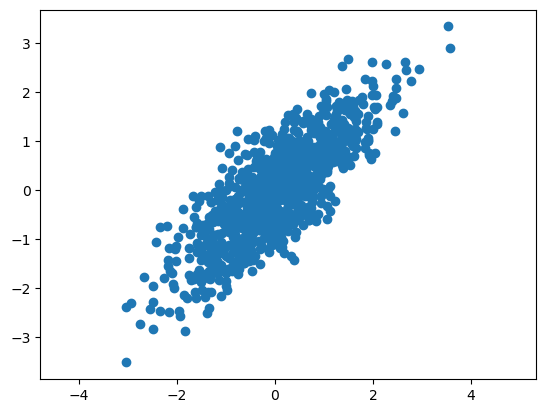

In [28]:
plt.scatter(XY[:,0],XY[:,1])
plt.axis('equal')
plt.show()

In [29]:
# sprawdzic potem~!
N = 100
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
pos

array([[[-5.       , -5.       ],
        [-4.8989899, -5.       ],
        [-4.7979798, -5.       ],
        ...,
        [ 4.7979798, -5.       ],
        [ 4.8989899, -5.       ],
        [ 5.       , -5.       ]],

       [[-5.       , -4.8989899],
        [-4.8989899, -4.8989899],
        [-4.7979798, -4.8989899],
        ...,
        [ 4.7979798, -4.8989899],
        [ 4.8989899, -4.8989899],
        [ 5.       , -4.8989899]],

       [[-5.       , -4.7979798],
        [-4.8989899, -4.7979798],
        [-4.7979798, -4.7979798],
        ...,
        [ 4.7979798, -4.7979798],
        [ 4.8989899, -4.7979798],
        [ 5.       , -4.7979798]],

       ...,

       [[-5.       ,  4.7979798],
        [-4.8989899,  4.7979798],
        [-4.7979798,  4.7979798],
        ...,
        [ 4.7979798,  4.7979798],
        [ 4.8989899,  4.7979798],
        [ 5.       ,  4.7979798]],

       [[-5.       ,  4.8989899],
        [-4.8989899,  4.8989899],
        [-4.7979798,  4.8989899],
        .

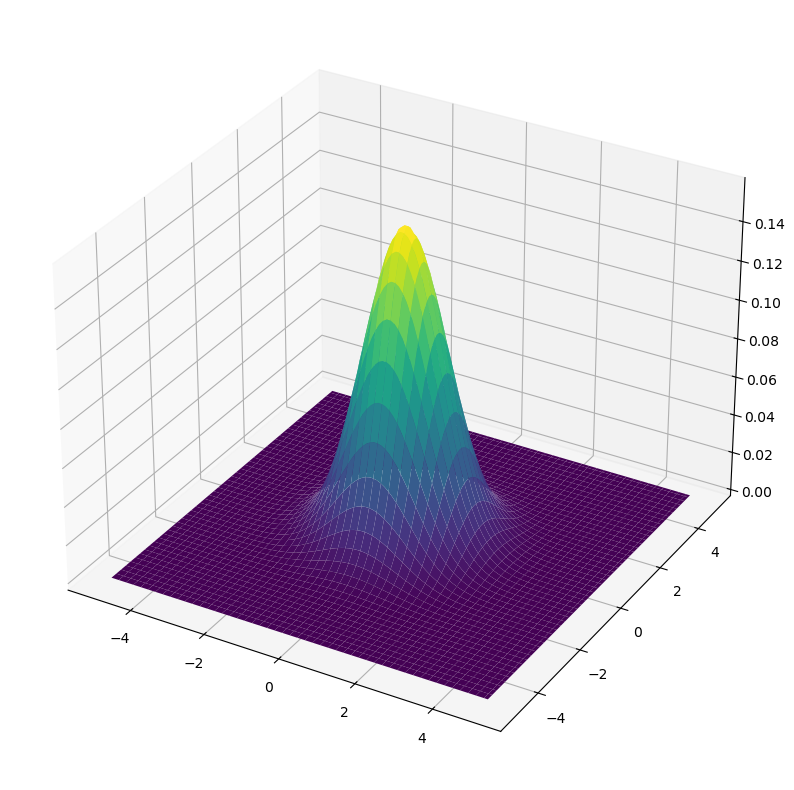

In [30]:
#gęstość
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)

C:\Users\BPE\AppData\Local\Temp\ipykernel_16144\2401250303.py:3: UserWarning: The following kwargs were not used by contour: 'origincmap'
  ax.contourf(X,Y,Z,origincmap = cm.viridis);


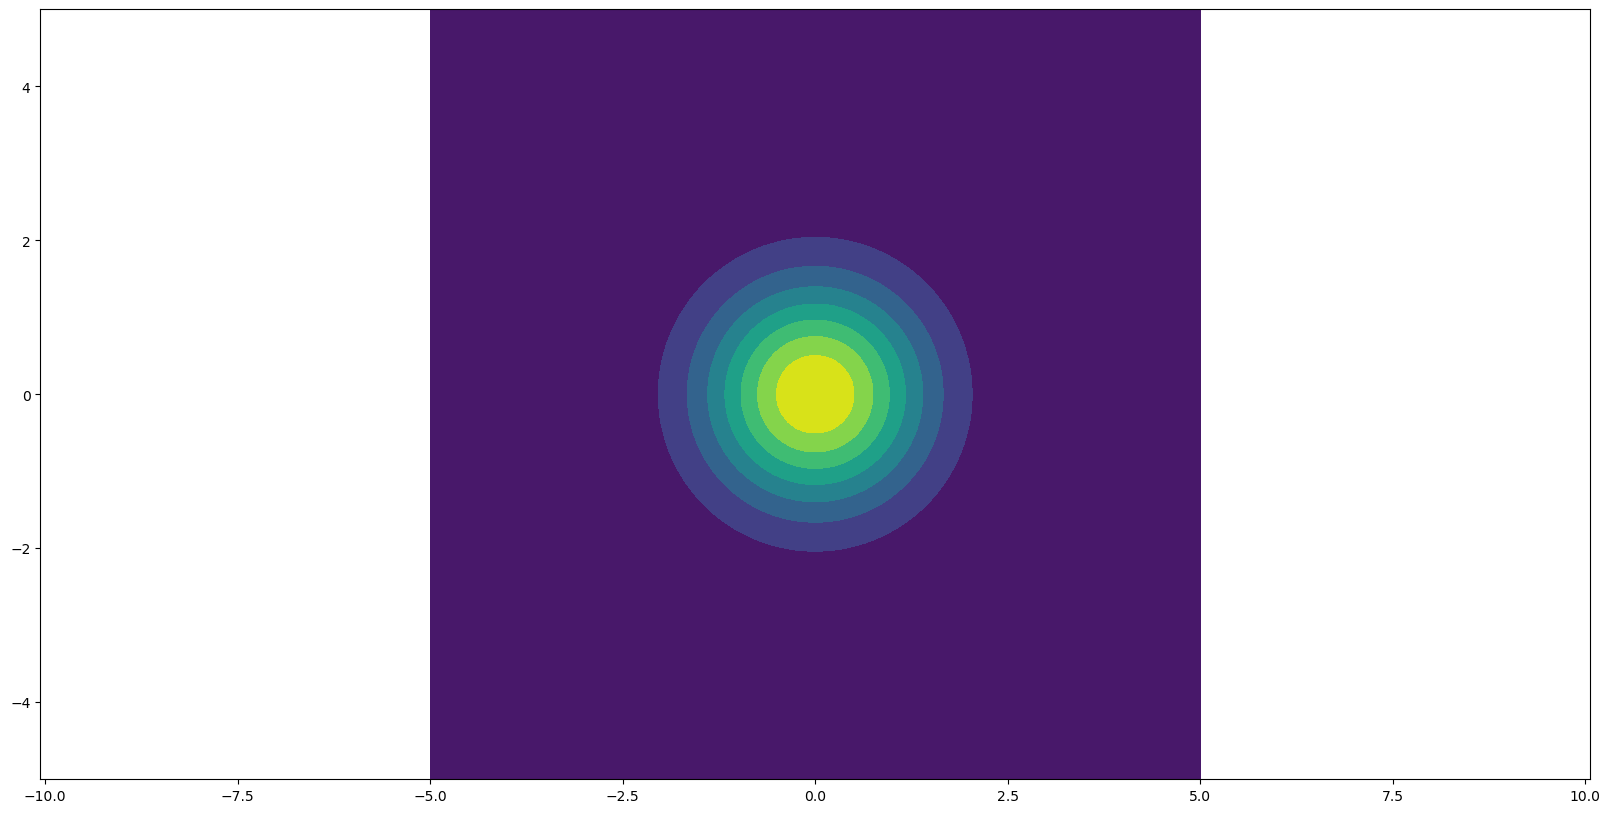

In [26]:
fig,ax = plt.subplots(figsize = (20,10))
plt.axis('equal')
ax.contourf(X,Y,Z,origincmap = cm.viridis);
# widok z gory

### Kowariancja
Kowariancją zmiennych losowych $X$ i $Y$ nazywamy liczbę $\text{Cov}(X, Y)$ określoną wzorem
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}X)(Y-\mathbb{E}Y) ].
\end{equation*}

Kowariancja może być traktowana jako pewna miara zgodności dwóch zmiennych losowych, będąc średnią wartością iloczynu odchyleń obu zmiennych od ich wartości oczekiwanych.

Bezpośrednio z definicji wynika, że
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}(XY) - (\mathbb{E}X)(\mathbb{E}Y).
\end{equation*}

Gdy zmienna losowa $(X, Y)$ jest typu dyskretnego, to
    \begin{equation*}
        \mathbb{E}(XY) = \sum_i\sum_k x_iy_kP(X=x_i, Y=y_k).
    \end{equation*}
Gdy zmienna losowa $(X, Y)$ jest typu ciągłego, to
    \begin{equation*}
        \mathbb{E}(XY) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} xyf(x,y)dxdy.
    \end{equation*}

Własności:
    

*   Jeżeli $\text{Cov}(X, Y)=0$, to zmienne losowe $X$ i $Y$ nazywamy eskorelowanymi. Wynika stąd, że zmienne losowe niezależne są jednocześnie nieskorelowane, ale zmienne losowe nieskorelowane mogą być zależne.
*   $\text{Var}(X\pm Y) = \text{Var}(X) + \text{Var}(Y) \pm 2\text{Cov}(X, Y)$.
*   $\text{Cov}(aX+b, cY+d) = ac\text{Cov}(X, Y)$.


#Współczynnik korelacji
Współczynnikiem korelacji zmiennych losowych $X$ i $Y$ nazywamy liczbę
\begin{equation*}
    \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)}\sqrt{\text{Var}(Y)}}
\end{equation*}
Własności:

*    $|\rho(X, Y)|\leq 1$.
*    Jeżeli zmienne losowe $X$ i $Y$ są niezależne, to $\rho(X, Y)=0$.
*   Dla dowolnych liczb rzeczywistych $a, b, c, d$ zachodzi
    \begin{equation*}
        |\rho(aX+b, cY+d)|=|\rho(X, Y)|.
    \end{equation*}
*    Zmienne losowe $X$ i $Y$ są zależne liniowo wtedy i tylko wtedy, gdy $|\rho(X, Y)|=1$

#Korelacja Pearsona
Chcemy przybliżać $\rho(X, Y)$ za pomocą próby. Empirycznym odpowiednikiem korelacji jest korelacja Pearsona dana wzorem:
\begin{equation*}
\hat{\rho}(X_1,...,X_n,Y_1,..,Y_n) = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}}
\end{equation*}

#Macierz Kowariancji

Niech $(X_1, X_2, \ldots, X_n)$ będzie wektorem losowym (o składowych całkowalnych z kwadratem), wtedy \textbf{macierz kowariancji} jest określona następująco:
\begin{equation*}
    \sum =
\begin{bmatrix}
\sigma^2_1 & \sigma_{12} & \ldots & \sigma_{1n}\\
\sigma_{21} & \sigma^2_2 & \ldots & \sigma_{2n}\\
\vdots & \ldots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \ldots & \sigma^2_n
\end{bmatrix}
\end{equation*}
gdzie:
*    $\sigma_i^2$ jest wariancją zmiennej losowej $X_i$;
*    $\sigma_{ij}=\text{Cov}(X_i, X_j)$ jest kowariancją między zmiennymi losowym $X_i$ oraz $X_j$.

#Wielowymiarowy rozkład normalny
Wektor losowy $(X_1,\ldots, X_n)$ ma rozkład $N$-wymiarowy rozkład normalny z macierzą kowariancji $\sum$ oraz wektorem średnich $\mu$, jeżeli jej gęstość $f$ wyraża się wzorem
\begin{equation*}
    f(x_1, \ldots, x_n) = \frac{1}{\sqrt{(2\pi)^n|\sum|}} \exp\Bigg\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \Bigg\}.
\end{equation*}


## Zadanie 3 - Korelacja zmiennych losowych
Wygeneruj $3$-wymiarowy wektor losowy z rozkładu normalnego, tak aby 1 i 2 współrzędne były ze sobą skorelowane, natomiast 1 i 3 oraz 2 i 3 są zmiennymi parami niezależnymi.

1. Narysuj zależność pomiędzy parami zmiennych (np. możesz użyć funcji `pairplot`)
2. Oblicz współczynnik korelacji Pearsona dla wygenerowanych par zmiennych i narysuj `heatmape`.
3. Powtórz punkty 1 i 2 dla wektora $5$-wymiarowego z rozkładu normalnego, tak aby 1, 3 i 5 współrzędne były ze sobą skorelowane a pozostałe niezależne.

\begin{equation*}
    \sum =
\begin{bmatrix}
\sigma^2_1 & \sigma_{12}  & \sigma_{13}\\
\sigma_{21} & \sigma^2_2  & \sigma_{23}\\
\sigma_{31} & \sigma_{32}  & \sigma^2_3
\end{bmatrix}
\end{equation*}

In [32]:
mu = [0,0,0]
s=[[4,2,0],[2,4,0],[0,0,4]]

mnormal = multivariate_normal(mean = mu,cov = s)

          0         1         2
0  1.000000  0.459308 -0.001266
1  0.459308  1.000000  0.021534
2 -0.001266  0.021534  1.000000


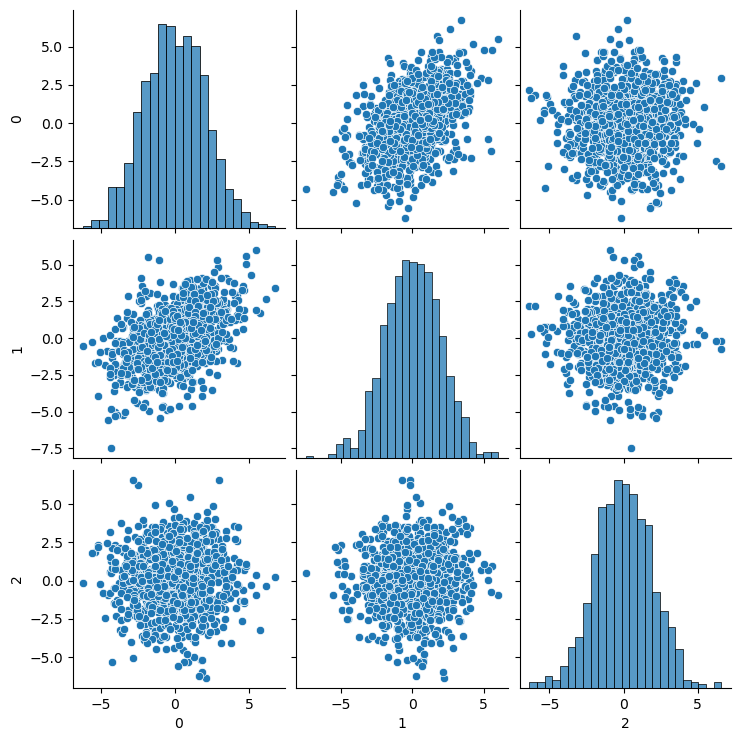

In [33]:
XYZ = mnormal.rvs(size=1000)
df = pd.DataFrame(XYZ)
cor = df.corr()
print(cor)
sns.pairplot(df)

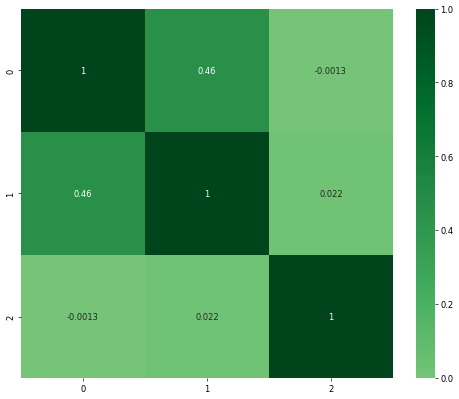

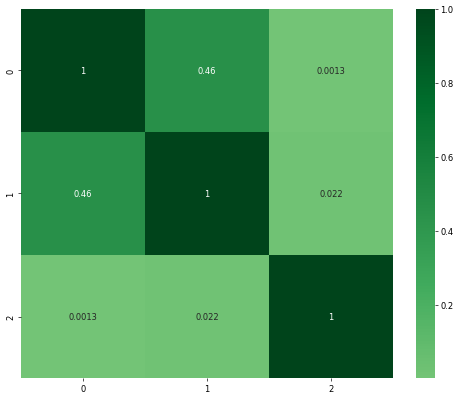

In [34]:
#heatmapa
plt.figure(figsize=(10,8),dpi = 60)
ax = sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,cmap = 'Greens',center = 0,annot = True)
plt.show()
#można brać też wartości bezwzględne - wówczas im ciemniejszy kolor
#tym bardziej od siebie zależne zmienne
plt.figure(figsize=(10,8),dpi = 60)
ax = sns.heatmap(np.abs(cor),xticklabels=cor.columns,yticklabels=cor.columns,cmap = 'Greens',center = 0,annot = True)
plt.show()

## Zadanie 4 - Centralne twierdzenie graniczne

1. Szacuje się, że w średnia wartość ilorazu inteligencji wynosi 100 z odchyleniem standardowym 15. Jakie jest prawdopodobieństwo, że wśród 30 losowo wybranych osób, ich średni iloraz inteligencji przekroczy 105?

2. Szacuje się, że 60% dorosłych Polaków posiada własny samochód. Jakie jest prawdopodobieństwo, że wśród 1000 osób będzie od 500 do 700 posiadaczy własnego auta?

3. Co dwudziesta młoda osoba w Polsce jest na diecie wegańskiej. Wyznacz prawdopodobieństwo, że wśród 100 młodych Polaków, od 5 do 10 osób będzie na diecie wegańskiej?

4. Szacuje się, że rozkład wieku kobiety w chwili urodzenia pierwszego dziecka jest normalny ze średnią 27 lat i odchyleniu standardowym 4 lata. Jakie jest prawdopodobieństwo, że wśród 100 losowo wybranych kobiet, ich średnia wieku, kiedy urodziły pierwsze dziecko przekroczy 30 lat?

5. Przeprowadzone badania pokazały, że co trzeci dorosły mężczyzna dojeżdża do pracy własnym pojazdem. Jakie jest prawdopodobieństwo, że wśród 300 losowo wybranych mężczyzn co najmniej 80, ale nie więcej niż 120, dojeżdża do pracy własnym pojazdem?

6. Przyjmuje się, że 1\% populacji choruje na schizofrenię. Oblicz prawdopodobieństwo, że wśród losowo wybranych
1000 osób będzie więcej niż 12 cierpiących na to zaburzenie.

1. Mamy rozkład (niekoniecznie normalny) o średniej $\mu = 100$ i odchyleniem standardowym $\sigma = 15$. Chcemy, żeby średnia była większa od $105$, zatem chcemy aby suma: $S_n>105*30 = 3150$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(S_n>3150) = 1-\mathbb{P}(S_n\leqslant 3150)\\
 = 1-\mathbb{P}\left(\frac{S_n-n\mu}{\sqrt{n}\sigma}\leqslant \frac{3150-n\mu}{\sqrt{n}\sigma}\right) \\
 = 1-\mathbb{P}\left(\frac{S_n-30*100}{\sqrt{30}*15}\leqslant \frac{3150-30*100}{\sqrt{30}*15}\right)\\
 = 1-\mathbb{P}\left(\frac{S_n-3000}{\sqrt{30}*15}\leqslant \frac{10}{\sqrt{30}}\right)\\
  \approx 1-𝚽\left(\frac{10}{\sqrt{30}}\right) \approx 0.03
\end{equation*}

2. Mamy rozkład Benoulliego o prawdopodobieństwie $p = 0.6$. Chcemy, żeby suma osób posiadających samochody była od $500$ do $700$, zatem chcemy aby suma: $500\leqslant S_n\leqslant 700$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(500\leqslant S_n\leqslant 700) =...
\end{equation*}

3. Mamy rozkład Benoulliego o prawdopodobieństwie $p = 0.05$. Chcemy, żeby suma osób na diecie wegańskiej była od $5$ do $10$, zatem chcemy aby suma: $5\leqslant S_n\leqslant 10$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(5\leqslant S_n\leqslant 10) =...
\end{equation*}

4. Mamy rozkład normalny o średniej $\mu = 27$ i odchyleniem standardowym $\sigma = 4$. Chcemy, żeby średnia była większa od $30$, zatem chcemy aby suma: $S_n>100*30 = 3000$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(S_n>3000) = ...
\end{equation*}

5. Mamy rozkład Benoulliego o prawdopodobieństwie $p = \frac{1}{3}$. Chcemy, żeby suma osób dojeżdżających swoim pojazdem do pracy była od $80$ do $120$, zatem chcemy aby suma: $80\leqslant S_n\leqslant 120$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(80\leqslant S_n\leqslant 120) =...
\end{equation*}

6. Mamy rozkład Benoulliego o prawdopodobieństwie $p = 0.01$. Chcemy, obliczyć prawdopodobieństwo zdarzenia, że suma osób chorujących na schizofrenię jest większa od $12$, zatem chcemy aby suma: $12< S_n$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(12< S_n) = ...
\end{equation*}